In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

path='paper'
os.mkdir(path)

path='paper/closing'
os.mkdir(path)

path='paper/iris'
os.mkdir(path)

path='paper/opening'
os.mkdir(path)

path='paper/threshold'
os.mkdir(path)

path="paper/contour"
os.mkdir(path)

In [ ]:
path="final_iris2"
os.mkdir(path)

path="edging_5"
os.mkdir(path)

In [ ]:
import cv2
import numpy as np
import glob
import pickle

eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

def transform_image(img,threshold):
    retval, threshold = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)
    close = closing
    open_close = cv2.bitwise_or(opening, closing, mask = None)
    return open_close,opening,close

imgs = []
label=0
final_output = []
lables = []
eye_detected_imgs=[]
iris_eye_detected_imgs=[]

In [ ]:
for filepath in glob.iglob('/content/drive/MyDrive/Iris2/*'):
    num_in_folder= 0

    for filefilepath in glob.iglob(filepath+'/*'):
        if filefilepath[-1] == 'g':
            img	= cv2.imread(filefilepath)
            imgs_colored=cv2.imread(filefilepath)
            img=cv2.resize(img,(200,150))

            img	=	cv2.cvtColor(img,	cv2.COLOR_BGR2GRAY)
            imgs.append([img,num_in_folder,label,imgs_colored])
            num_in_folder = num_in_folder+1
    label=label+1

In [ ]:
eyes_num=0
#eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

for i,j,L,c in imgs:
    i=cv2.resize(i,(400,400))
    eyes = eye_cascade.detectMultiScale(i, 1.01, 0)

    if len(eyes)>1:
        print(eyes_num)
        eye_detected_imgs.append(imgs[eyes_num])
        eyes_num = eyes_num+1
        maxium_area = -3

        for (ex,ey,ew,eh) in eyes:
            area = ew*eh

            if area>maxium_area:
                maxium_area = area
                maxium_width=ew
                point_x=ex
                point_y=ey
                maxium_height = eh
        #cv2.rectangle(c,(point_x,point_y),(point_x+maxium_width,+maxium_height),(255,0,0),2)

print("total_eyes_found = ",eyes_num)
print("total images number ",len(imgs))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
iris_num=0
for i,j,L,c in eye_detected_imgs:
    circles = cv2.HoughCircles(i, cv2.HOUGH_GRADIENT, 10, 100)

    if circles is not None :
        circles = np.round(circles[0, :]).astype("int")
        #print(len(circles))
        #print(y)

        maxiumum_average=10000000000000
        #print(len(circles))
        #print(i.shape[0])
        #print(i.shape[1])
        #print(min(i.shape))

        key=True
        for (x, y, r) in circles:

            if x+r<=max(i.shape) and y+r<=max(i.shape)and x-r>0 and y-r>0 and r>20:
                key=False
                new_roi = i[y-r:y+r, x-r:x+r]
                average = np.average(new_roi)

                if average < maxiumum_average:
                    maxiumum_r = r
                    point_x=x
                    point_y=y
                    maxiumum_average=average
                #cv2.circle(i, (x, y), r, (0, 0, 0), 4)

        if key:
            #print("key opened")
            for (x, y, r) in circles:
                    maxiumu_raduis=-4

                    if r > maxiumu_raduis:
                        maxiumum_r = r
                        point_x=x
                        point_y=y
                        maxiumum_average=average

        #cv2.circle(c, (point_x, point_y), maxiumum_r, (255, 255, 0), 4)
        #print(str(L)+'.'+str(j)+"  =  "+str(maxiumum_average)+"  "+str(r))

        cv2.imwrite('paper/iris/'+str(L)+'.'+str(j)+'.jpg',c)
        iris_eye_detected_imgs.append(eye_detected_imgs[iris_num])
        iris_num = iris_num+1

            #roi_gray = gray[y:y+h, x:x+w]
            #roi_gray = gray[ey:ey+eh, ex:ex+ew]
            #roi_color = img[ey:ey+eh, ex:ex+ew]
print("total_iris_found = ",iris_num)
print("total images number ",len(imgs))

imgs = iris_eye_detected_imgs

total_iris_found =  501
total images number  501


In [ ]:
kernel = np.ones((5,5),np.uint8)

import random
random.shuffle(imgs)
test=[]
for i,j,L,c in imgs:
    gold,siver,diamond = transform_image(i,0)
    golden_refrence = sum(sum(gold))
    #print("golden refrence  = "+str(golden_refrence))

    for k in range(10,1000,10):
        working_img,opening,closing = transform_image(i,k)
        suming = sum(sum(working_img))
        diffrence = suming-golden_refrence

        if diffrence>800:
            print("the image threshold = " ,k)
            print("the image name " +str(j))
            print(" " )

            cv2.imwrite('paper/threshold/'+str(L)+'.'+str(j)+'.jpg',working_img)
            cv2.imwrite('paper/opening/'+str(L)+'.'+str(j)+'.jpg',opening)
            cv2.imwrite('paper/closing/'+str(L)+'.'+str(j)+'.jpg',closing)
            contours,_ = cv2.findContours(working_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

            for z in contours:
                x,y,w,h = cv2.boundingRect(z)
                if x+w<150 and y+h<200 and x-w//4>0:

                    cv2.rectangle(working_img,(x,y),(x+w,y+h),(0,255,0),-2)
                    cv2.imwrite('paper/contour/'+str(L)+'.'+str(j)+'.jpg',working_img)
            contours_2,_ = cv2.findContours(working_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
            #cv2.imwrite('paper/contour/'+str(L)+'.'+str(j)+'.jpg',contours_2)

            maxium_area=0
            maxium_area = 0
            maxium_width=0
            point_x=0
            point_y=0
            maxium_height = 0
            for z in contours_2:
                #print(len(i))
                x,y,w,h = cv2.boundingRect(z)
                new_area=h*w
                if x+w<150 and y+h<200 and new_area>maxium_area and x-w//4>0:
                    maxium_area = new_area
                    maxium_width=w
                    point_x=x
                    point_y=y
                    maxium_height = h

                    #cv2.rectangle(working_img,(x,y),(x+w,y+h),(0,255,0),-2)
            #cv2.rectangle(i,(point_x,point_y),(point_x+maxium_width,point_y+maxium_height),(0,255,0),-2)

            center_x = point_x+maxium_width//2
            center_y = point_y+maxium_height//2
            radius = 40

            if center_y-radius>0 and center_x-radius >0  and center_y+radius < 200 and center_x+radius < 150:
                #cv2.circle(c, (int(center_x), int(center_y)), int(radius),  (0, 255, 255), 2)
                new_roi = c[center_y-radius:center_y+radius, center_x-radius:center_x+radius]
                new_roi=cv2.resize(new_roi,(200,150))
                #new_roi	= cv2.cvtColor(new_roi,cv2.COLOR_GRAY2BGR)

                #cv2.imwrite('paper/threshold/'+str(L)+'.'+str(j)+'.jpg',new_roi)
                cv2.imwrite('final_iris2/'+str(L)+'.'+str(j)+'.jpg',new_roi)

            #new_roi=cv2.resize(new_roi,(200,150))
            else:
                center_y=c.shape[0]//2
                center_x=c.shape[1]//2
                new_roi = c[center_y-radius:center_y+radius, center_x-radius:center_x+radius]
                new_roi =cv2.resize(new_roi,(200,150))
                #new_roi = cv2.cvtColor(new_roi,cv2.COLOR_GRAY2BGR)
                cv2.imwrite('final_iris2/'+str(L)+'.'+str(j)+'.jpg',new_roi)

            cv2.imwrite('edging_5/'+str(L)+'_'+str(j)+'.jpg',i)
            test.append(i)
            final_output.append(new_roi)
            lables.append(L)
            #cv2.imwrite('edging_5_test/'+str(j[5:]),i)
            break

the image threshold =  70
the image name 3
 
the image threshold =  80
the image name 0
 
the image threshold =  70
the image name 2
 
the image threshold =  50
the image name 4
 
the image threshold =  80
the image name 3
 
the image threshold =  70
the image name 3
 
the image threshold =  100
the image name 2
 
the image threshold =  80
the image name 2
 
the image threshold =  80
the image name 3
 
the image threshold =  100
the image name 1
 
the image threshold =  60
the image name 4
 
the image threshold =  60
the image name 4
 
the image threshold =  70
the image name 3
 
the image threshold =  70
the image name 1
 
the image threshold =  60
the image name 2
 
the image threshold =  80
the image name 2
 
the image threshold =  60
the image name 1
 
the image threshold =  60
the image name 1
 
the image threshold =  90
the image name 2
 
the image threshold =  60
the image name 2
 
the image threshold =  80
the image name 1
 
the image threshold =  70
the image name 0
 
the imag

In [ ]:
print("the lenght of final output = ",len(final_output))
print("the of lables = ",len(lables))

final_output=np.array(final_output)
print(final_output.shape)

test=np.array(test)
print(test.shape)

pickle_out = open("test_ubiris.pickle","wb")
pickle.dump(test, pickle_out)
pickle_out.close()

pickle_out = open("ubiris_features.pickle","wb")
pickle.dump(final_output, pickle_out)
pickle_out.close()

pickle_out = open("ubiris_lables.pickle","wb")
pickle.dump(lables, pickle_out)
pickle_out.close()

the lenght of final output =  501
the of lables =  501
(501, 150, 200, 3)
(501, 150, 200)


Classification

In [ ]:
import cv2
import numpy as np
import glob
import pickle
import joblib
from keras.applications.vgg16 import preprocess_input
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import glob
import keras
from keras.models       import Model
from keras.applications.densenet import DenseNet121
from keras.applications.vgg16 import VGG16
from keras.models import Model
import glob

In [ ]:
imgs=[]
final_output_84_84=[]
lables=[]
for filefilepath in glob.iglob('/content/paper/iris/*'):
    if filefilepath[-1] == 'g':

        img	= cv2.imread(filefilepath)
        imgs_colored=cv2.imread(filefilepath)
        #img=cv2.resize(img,(200,150))
        #imgs_colored.append(img)

        print(filefilepath)
        #print(filefilepath[19:-6])
        #print(filefilepath[-5])
        split = filefilepath.split(".")
        #print(split)
        print(split[0][20:])
        print(split[1])

        label=split[0][20:]
        example_number = split[1]
        imgs.append([imgs_colored,int(label)])
        #final_output_84_84.append(imgs_colored)
        #lables.append(int(label))

/content/paper/iris/2.1.jpg
2
1
/content/paper/iris/63.3.jpg
63
3
/content/paper/iris/70.4.jpg
70
4
/content/paper/iris/77.0.jpg
77
0
/content/paper/iris/91.1.jpg
91
1
/content/paper/iris/51.4.jpg
51
4
/content/paper/iris/22.2.jpg
22
2
/content/paper/iris/68.0.jpg
68
0
/content/paper/iris/8.4.jpg
8
4
/content/paper/iris/8.0.jpg
8
0
/content/paper/iris/97.3.jpg
97
3
/content/paper/iris/8.2.jpg
8
2
/content/paper/iris/65.2.jpg
65
2
/content/paper/iris/71.2.jpg
71
2
/content/paper/iris/37.0.jpg
37
0
/content/paper/iris/7.0.jpg
7
0
/content/paper/iris/54.4.jpg
54
4
/content/paper/iris/0.0.jpg
0
0
/content/paper/iris/86.2.jpg
86
2
/content/paper/iris/66.0.jpg
66
0
/content/paper/iris/3.1.jpg
3
1
/content/paper/iris/92.2.jpg
92
2
/content/paper/iris/15.4.jpg
15
4
/content/paper/iris/74.2.jpg
74
2
/content/paper/iris/56.0.jpg
56
0
/content/paper/iris/73.1.jpg
73
1
/content/paper/iris/11.0.jpg
11
0
/content/paper/iris/74.1.jpg
74
1
/content/paper/iris/20.2.jpg
20
2
/content/paper/iris/27.4.jpg

In [ ]:
import random

random.shuffle(imgs)
for i,j in imgs:
        final_output_84_84.append(i)
        lables.append(j)

print(len(final_output_84_84))
print(len(lables))

501
501


In [ ]:
img_size=(200,200)
y=keras.utils.to_categorical(lables, num_classes=100, dtype='float32')  ##240 classes
final_output_84_84 = np.array(final_output_84_84,dtype="float16")/255
print(len(final_output_84_84))

501


In [ ]:
from keras.models       import Model
from keras.applications.densenet import DenseNet201
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50

#original_model = ResNet50(include_top=False)
#original_model = VGG16(include_top=False)
original_model = DenseNet201(include_top=False)
#original_model = InceptionV3(include_top=False)
#original_model = InceptionResNetV2(include_top=False)
#original_model = Xception(include_top=False)

bottleneck_input  = original_model.get_layer(index=0).input
bottleneck_output = original_model.get_layer(index=-59).output
bottleneck_model  = Model(inputs=bottleneck_input,  outputs=bottleneck_output)

bottleneck_model.summary()

74836368/74836368 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, None, None, 3)        0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, None, None, 64)       9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  

In [ ]:
final_output_84_84[0].shape

(150, 200, 3)

In [ ]:
test = final_output_84_84[0]
test = test.reshape(1, 150, img_size[1],3)
test_shape = bottleneck_model.predict(test).shape
print(test_shape)
shape = (final_output_84_84.shape[0],test_shape[1],test_shape[2],test_shape[3])
print(shape)
print(shape[1:])

1/1 [==============================] - 3s 3s/step
(1, 4, 6, 1664)
(501, 4, 6, 1664)
(4, 6, 1664)


In [ ]:
test.shape

(1, 150, 200, 3)

In [ ]:
img_size

(150, 200)

In [ ]:
bottelneck_features = []
for i in final_output_84_84:

    i = i.reshape(1, 150, 200,3) #(1, img_size[0], img_size[1],3)
    bottelneck_features.append(bottleneck_model.predict(i))
    print(len(bottelneck_features))

    #if len(bottelneck_features)==20000:
        #break

bottelneck_features=np.array(bottelneck_features)
print(bottelneck_features.shape)

1/1 [==============================] - 0s 103ms/step
1
1/1 [==============================] - 0s 96ms/step
2
1/1 [==============================] - 0s 101ms/step
3
1/1 [==============================] - 0s 110ms/step
4
1/1 [==============================] - 0s 142ms/step
5
1/1 [==============================] - 0s 132ms/step
6
1/1 [==============================] - 0s 140ms/step
7
1/1 [==============================] - 0s 149ms/step
8
1/1 [==============================] - 0s 136ms/step
9
1/1 [==============================] - 0s 138ms/step
10
1/1 [==============================] - 0s 144ms/step
11
1/1 [==============================] - 0s 150ms/step
12
1/1 [==============================] - 0s 157ms/step
13
1/1 [==============================] - 0s 98ms/step
14
1/1 [==============================] - 0s 102ms/step
15
1/1 [==============================] - 0s 96ms/step
16
1/1 [==============================] - 0s 97ms/step
17
1/1 [==============================] - 0s 104ms/step
18
1/1 [

In [ ]:
#print(np.amax(ubiris_features)  )
bottelneck_features =  bottelneck_features.reshape(shape) #4, 6, 512
print(bottelneck_features.shape)

(501, 4, 6, 1664)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm

(X_train, X_test, y_train, y_test) = train_test_split(bottelneck_features, y,test_size=0.05, random_state=1250)

In [ ]:
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Flatten,Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(Flatten(input_shape=(shape[1:])))#4, 6, 512
#model.add(Dense(500, activation='relu'))
#model.add(Dropout(0.8))
model.add(Dense(100, activation='softmax'))
sgd = optimizers.SGD(lr=0.1)
#adam = optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 39936)             0         
                                                                 
 dense_1 (Dense)             (None, 100)               3993700   
                                                                 
Total params: 3993700 (15.23 MB)
Trainable params: 3993700 (15.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='ubirisv1_dense_net_0.2_adam.hdf5', verbose=1, save_best_only=True)
#X_train, X_test, y_train, y_test

history=model.fit(X_train,y_train, batch_size=32, epochs=30, shuffle=True,validation_data=(X_test, y_test), verbose=1 ,callbacks=[checkpointer])

: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


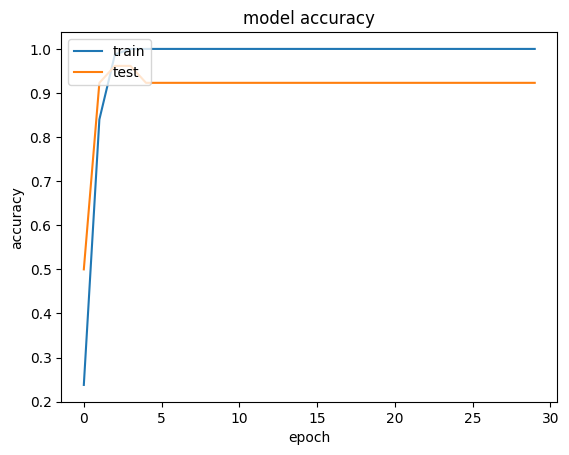

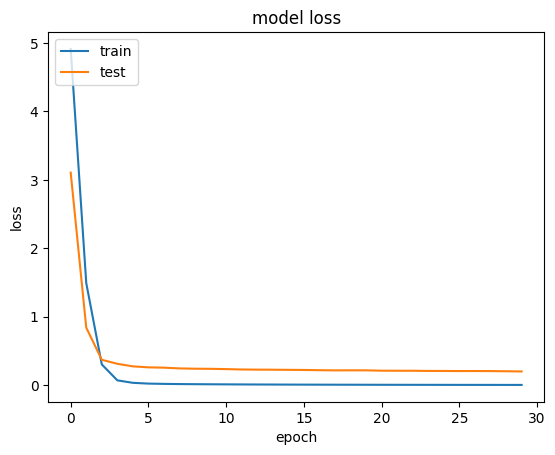

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
!pip install pycm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.8/599.8 kB 5.9 MB/s eta 0:00:00


In [ ]:
from pycm import ConfusionMatrix

results_test = model.predict(X_test)

cm = ConfusionMatrix(actual_vector=y_test.argmax(axis=1),predict_vector=results_test.argmax(axis=1))
print(cm)

Predict  0        5        8        9        12       14       17       19       26       30       37       40       42       47       49       69       76       77       81       83       85       93       94       95       
Actual
0        1        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

5        0        1        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

8        0        0        1        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

9        0        0        0        1        0        0        0        0        0    

/usr/local/lib/python3.10/dist-packages/pycm/pycm_obj.py:217: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)
